## Visualization Exploration Data Analysis (EDA)

### 1. Deklarasi pustaka

In [1]:
# pustaka untuk manipulasi data-frame
import pandas as pd
from pandas import concat
from pandas import read_csv
from pandas import read_excel

# pustaka untuk madnipulasi data-array
import numpy as np
from numpy import concatenate
from numpy import array

# pustaka untuk waktu komputasi
import time
from datetime import datetime

# pustaka untuk visualisasi data
import seaborn as sns
from matplotlib import pyplot
from matplotlib import pyplot as plt

# pustaka untuk visualisasi acf dan pacf
import scipy.stats as sc
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
        
# pustaka untuk membuat data latih dan data uji.
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# # pustaka untuk membuat model prediksi LSTM-RNN
# import itertools
# from itertools import cycle
# import tensorflow as tf
# from keras.models import Sequential
# from keras.layers import SimpleRNN
# from keras.layers import LSTM
# from keras.layers import GRU
# from keras.layers import Dense
# from keras.layers import Dropout
# from keras.layers import TimeDistributed
# from keras.layers import Bidirectional
# from keras.optimizers import Adam, Adamax, RMSprop, SGD

# # early stoping
# from keras.callbacks import EarlyStopping
# from keras.callbacks import ModelCheckpoint

# pustaka untuk  evaluasi model prediksi
import math
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

### 2. Akuisisi data

In [2]:
# Set waktu komputasi
start = time.time()

In [3]:
# # fix random seed for reproducibility
# np.random.seed(1234)

In [4]:
# membaca dataset via csv file
dataset = read_csv("D:/latihan-time-series/dataset/BTC-USD.csv", parse_dates=['Date']);

# # membaca dataset via API yahoo-finance
# dataset = DataReader('BTC-USD', data_source='yahoo', start='2015-01-01', end=datetime.today());

In [5]:
# set index tanggal
dataset = dataset.set_index("Date")

In [6]:
# check null and na values
print("Null values:", dataset.isnull().values.sum())
print("NA values:", dataset.isna().values.sum())

Null values: 0
NA values: 0


In [7]:
# menampilkan metadata dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2896 entries, 2014-12-09 to 2022-11-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2896 non-null   float64
 1   High       2896 non-null   float64
 2   Low        2896 non-null   float64
 3   Close      2896 non-null   float64
 4   Adj Close  2896 non-null   float64
 5   Volume     2896 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 158.4 KB


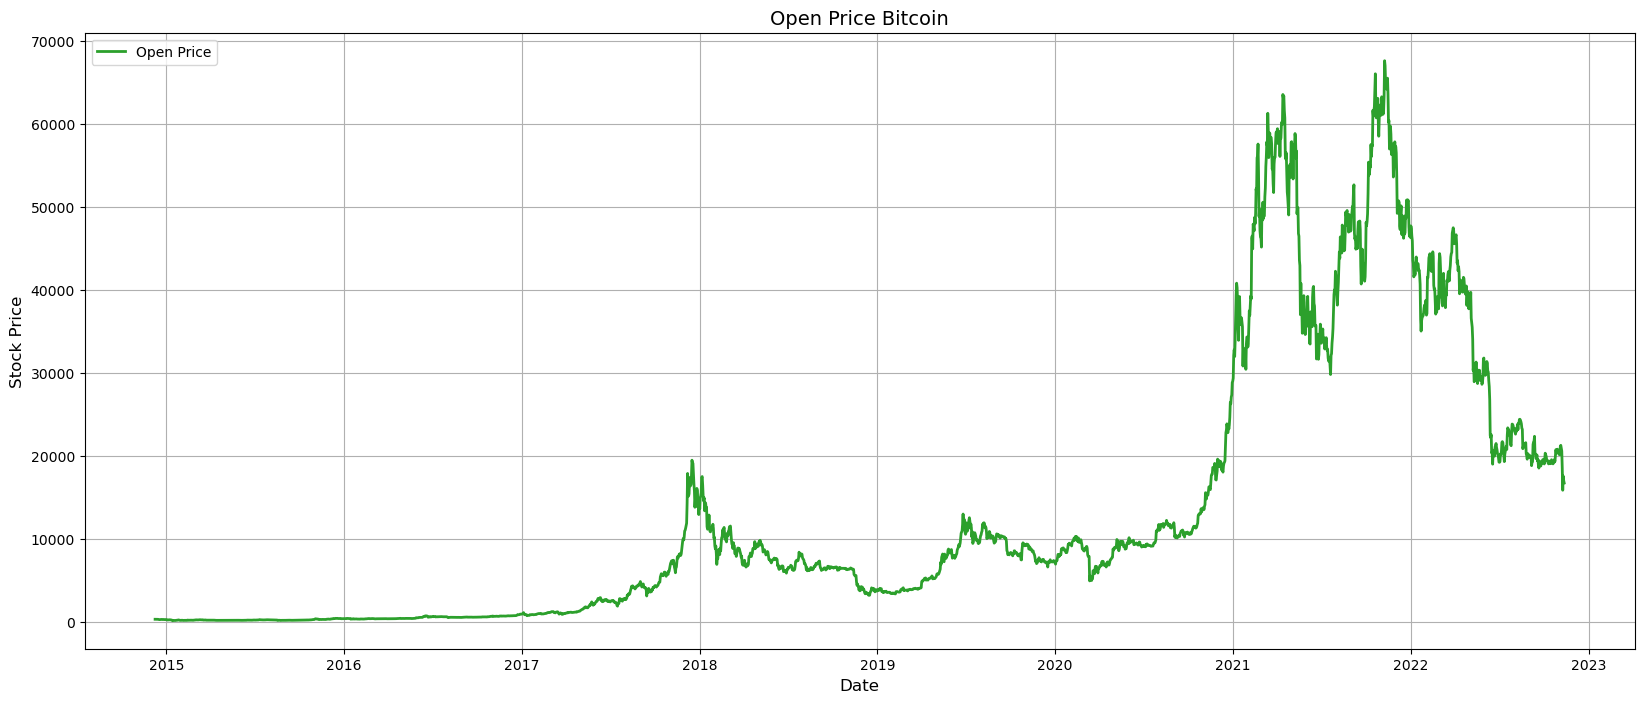

In [8]:
# membuat frame
fig, ax = plt.subplots(figsize=(20,8))

# membuat time series plot
ax.plot(dataset.index.values, dataset["Close"], color="tab:green", label="Open Price", linewidth=2)

# membuat label-label
ax.set_title("Open Price Bitcoin", fontsize=14)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Stock Price", fontsize=12)
ax.legend(loc='upper left')
ax.grid(True)

# menampilkan plot
plt.show()

### 3. Explorasi Data Analisis

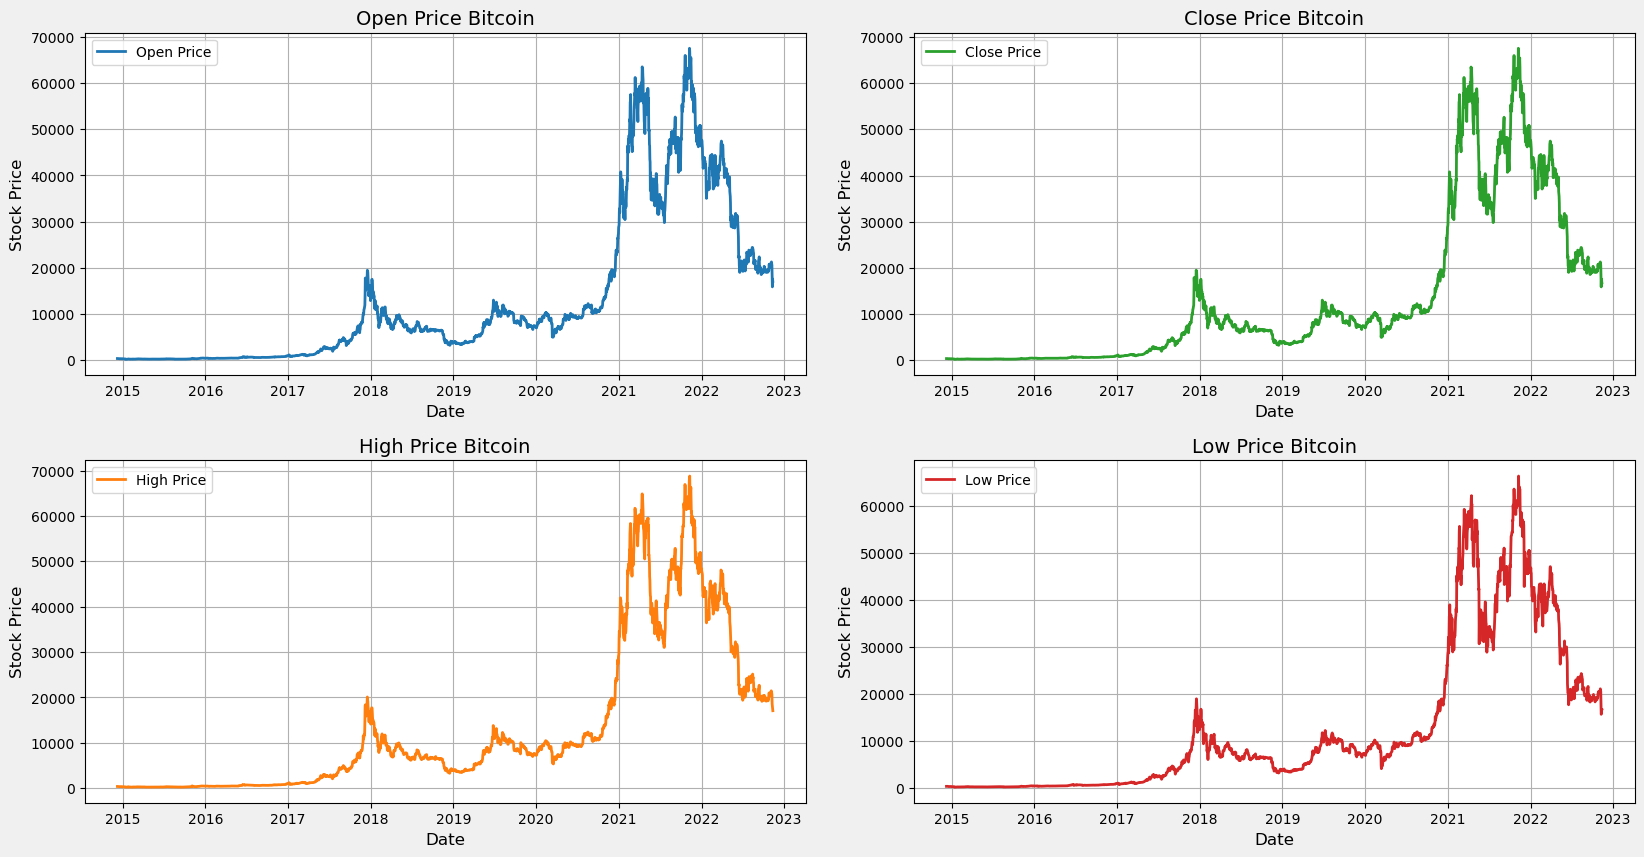

In [9]:
# membuat frame
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, facecolor="#f0f0f0", figsize=(20, 10))

# membuat time series plot
ax1.plot(dataset.index.values, dataset["Open"], color="tab:blue", label="Open Price", linewidth=2)

# membuat label-label
ax1.set_title("Open Price Bitcoin", fontsize=14)
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price", fontsize=12)
ax1.legend(loc='upper left')
ax1.grid(True)
# ----------------------------------------------------------------------------------------------------

# membuat time series plot
ax2.plot(dataset.index.values, dataset["Close"], color="tab:green", label="Close Price", linewidth=2)

# membuat label-label
ax2.set_title("Close Price Bitcoin", fontsize=14)
ax2.set_xlabel("Date", fontsize=12)
ax2.set_ylabel("Stock Price", fontsize=12)
ax2.legend(loc='upper left')
ax2.grid(True)
# ----------------------------------------------------------------------------------------------------

# membuat time series plot
ax3.plot(dataset.index.values, dataset["High"], color="tab:orange", label="High Price", linewidth=2)

# membuat label-label
ax3.set_title("High Price Bitcoin", fontsize=14)
ax3.set_xlabel("Date", fontsize=12)
ax3.set_ylabel("Stock Price", fontsize=12)
ax3.legend(loc='upper left')
ax3.grid(True)
# ----------------------------------------------------------------------------------------------------

# membuat time series plot
ax4.plot(dataset.index.values, dataset["Low"], color="tab:red", label="Low Price", linewidth=2)

# membuat label-label
ax4.set_title("Low Price Bitcoin", fontsize=14)
ax4.set_xlabel("Date", fontsize=12)
ax4.set_ylabel("Stock Price", fontsize=12)
ax4.legend(loc='upper left')
ax4.grid(True)
# ----------------------------------------------------------------------------------------------------

# set the spacing between subplots
plt.subplots_adjust(wspace=0.15, hspace=0.25)

# menampilkan plot
plt.show()

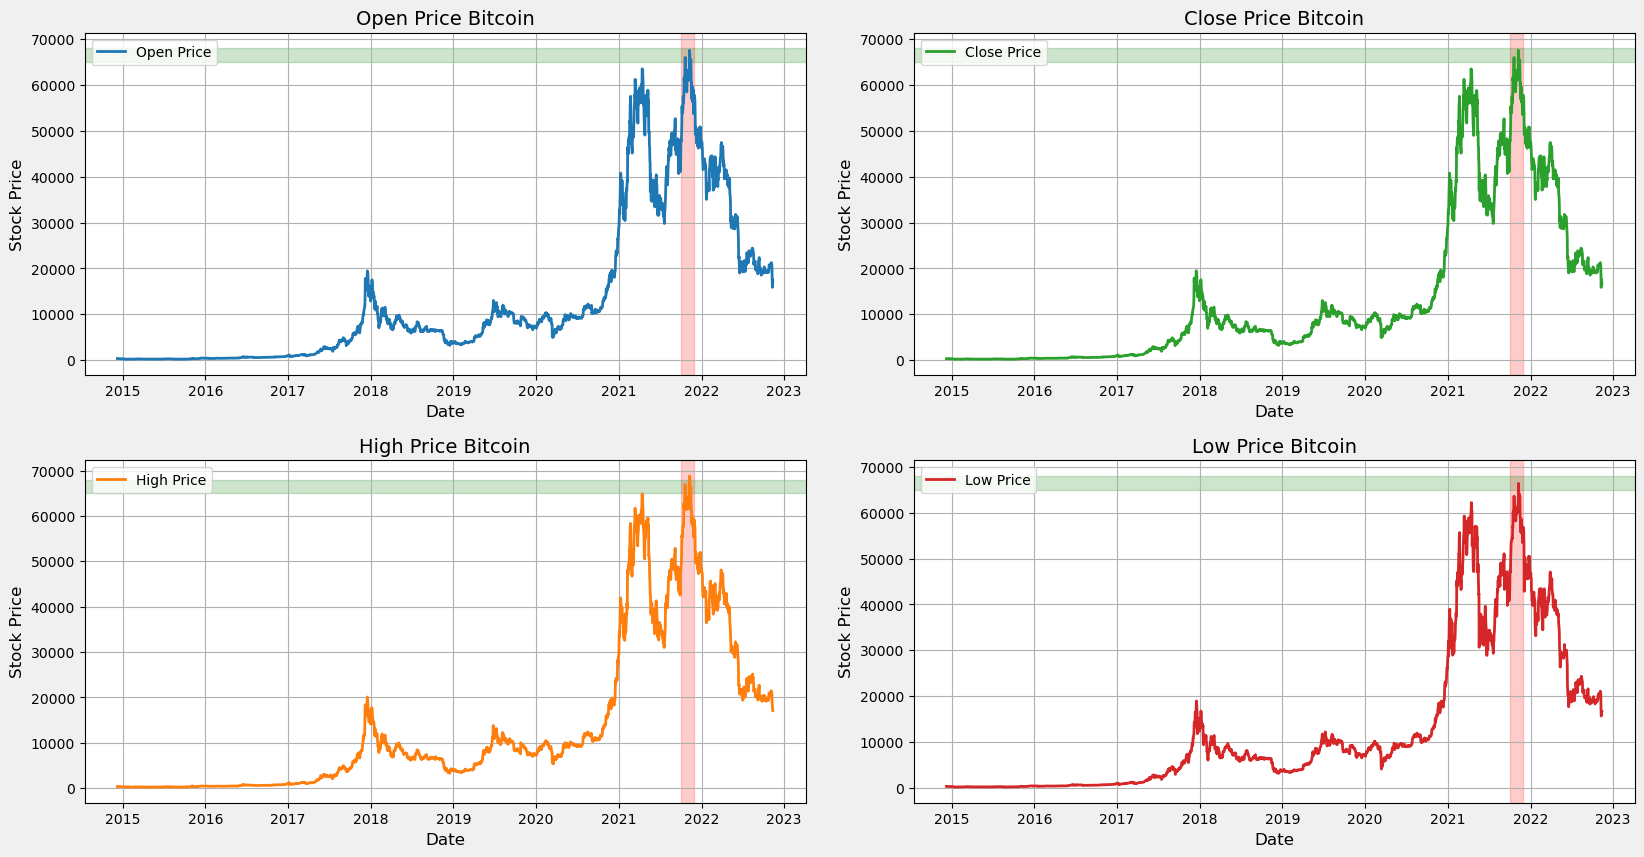

In [10]:
# membuat frame
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, facecolor="#f0f0f0", figsize=(20, 10))

# membuat time series plot
ax1.plot(dataset.index.values, dataset["Open"], color="tab:blue", label="Open Price", linewidth=2)

# membuat label-label
ax1.set_title("Open Price Bitcoin", fontsize=14)
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price", fontsize=12)
ax1.legend(loc='upper left')
ax1.grid(True)

# membuat weighted price
ax1.axvspan('2021-10-01','2021-11-30',color='red', alpha=0.2)
ax1.axhspan(65000,68000, color='green',alpha=0.2)
# ----------------------------------------------------------------------------------------------------

# membuat time series plot
ax2.plot(dataset.index.values, dataset["Close"], color="tab:green", label="Close Price", linewidth=2)

# membuat label-label
ax2.set_title("Close Price Bitcoin", fontsize=14)
ax2.set_xlabel("Date", fontsize=12)
ax2.set_ylabel("Stock Price", fontsize=12)
ax2.legend(loc='upper left')
ax2.grid(True)

# membuat weighted price
ax2.axvspan('2021-10-01','2021-11-30',color='red', alpha=0.2)
ax2.axhspan(65000,68000, color='green',alpha=0.2)
# ----------------------------------------------------------------------------------------------------

# membuat time series plot
ax3.plot(dataset.index.values, dataset["High"], color="tab:orange", label="High Price", linewidth=2)

# membuat label-label
ax3.set_title("High Price Bitcoin", fontsize=14)
ax3.set_xlabel("Date", fontsize=12)
ax3.set_ylabel("Stock Price", fontsize=12)
ax3.legend(loc='upper left')
ax3.grid(True)

# membuat weighted price
ax3.axvspan('2021-10-01','2021-11-30',color='red', alpha=0.2)
ax3.axhspan(65000,68000, color='green',alpha=0.2)
# ----------------------------------------------------------------------------------------------------

# membuat time series plot
ax4.plot(dataset.index.values, dataset["Low"], color="tab:red", label="Low Price", linewidth=2)

# membuat label-label
ax4.set_title("Low Price Bitcoin", fontsize=14)
ax4.set_xlabel("Date", fontsize=12)
ax4.set_ylabel("Stock Price", fontsize=12)
ax4.legend(loc='upper left')
ax4.grid(True)

# membuat weighted price
ax4.axvspan('2021-10-01','2021-11-30',color='red', alpha=0.2)
ax4.axhspan(65000,68000, color='green',alpha=0.2)
# ----------------------------------------------------------------------------------------------------

# set the spacing between subplots
plt.subplots_adjust(wspace=0.15, hspace=0.25)

# menampilkan plot
plt.show()

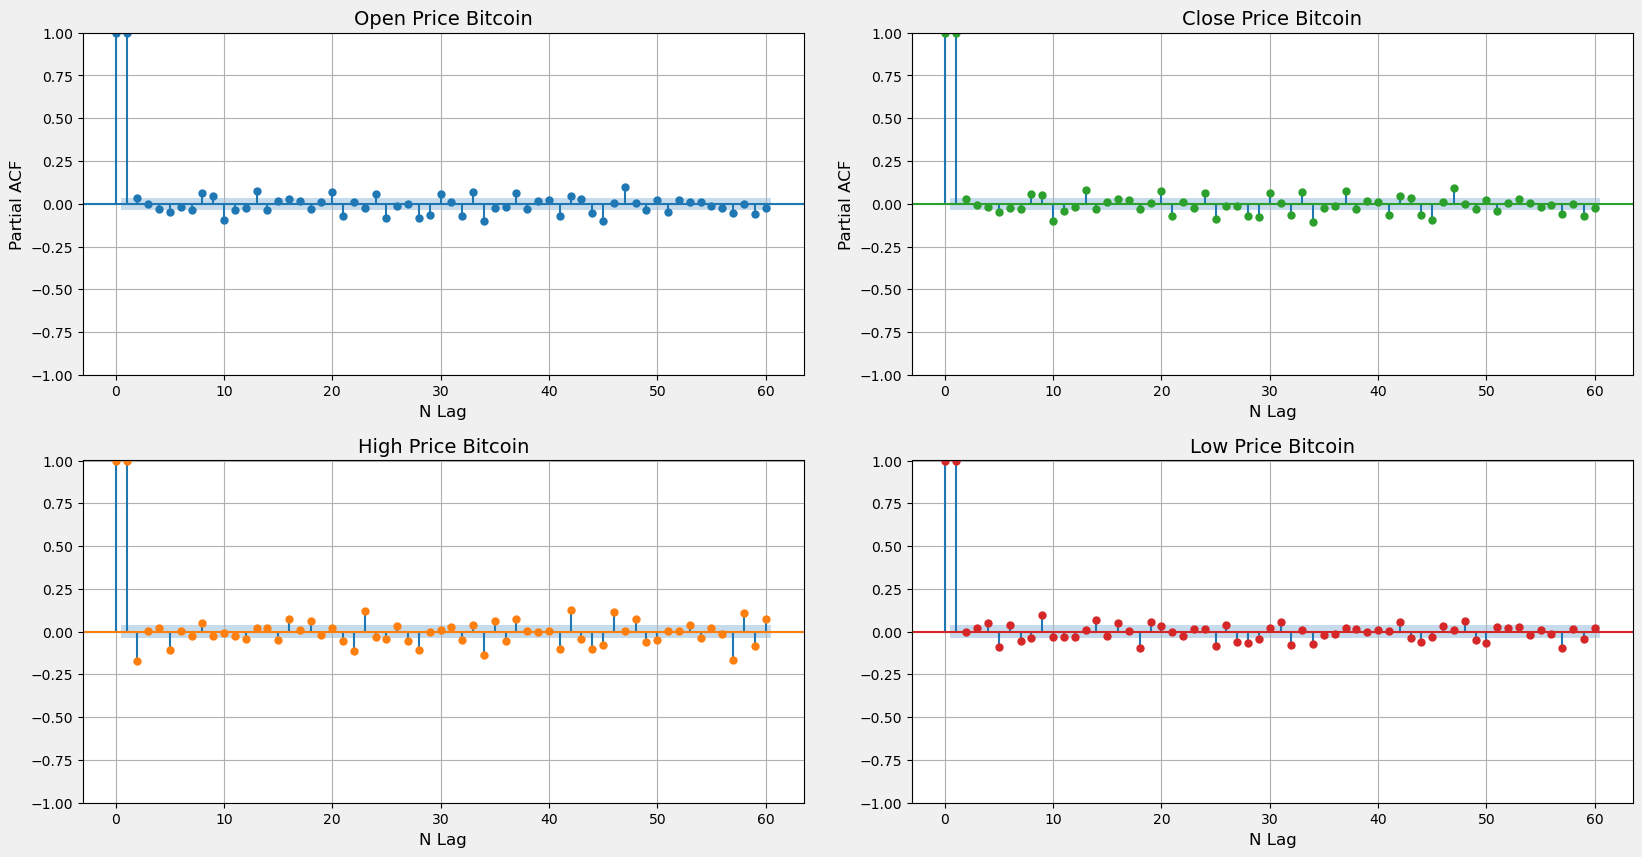

In [11]:
# code autocorrelation
# membuat frame
fig, ax = plt.subplots(nrows=2, ncols=2, facecolor="#f0f0f0", figsize=(20, 10))

# plot pacf open price
plot_pacf(dataset["Open"], lags=60, method="yw", ax=ax[0][0], color="tab:blue")

# membuat label-label
ax[0][0].set_title("Open Price Bitcoin", fontsize=14)
ax[0][0].set_xlabel("N Lag", fontsize=12)
ax[0][0].set_ylabel("Partial ACF", fontsize=12)
ax[0][0].grid(True)
# ----------------------------------------------------------------------------------------------------

# plot pacf close price
plot_pacf(dataset["Close"], lags=60, method="yw", ax=ax[0][1], color="tab:green")

# membuat label-label
ax[0][1].set_title("Close Price Bitcoin", fontsize=14)
ax[0][1].set_xlabel("N Lag", fontsize=12)
ax[0][1].set_ylabel("Partial ACF", fontsize=12)
ax[0][1].grid(True)
# ----------------------------------------------------------------------------------------------------

# plot pacf high price
plot_pacf(dataset["High"], lags=60, method="yw", ax=ax[1][0], color="tab:orange")

# membuat label-label
ax[1][0].set_title("High Price Bitcoin", fontsize=14)
ax[1][0].set_xlabel("N Lag", fontsize=12)
ax[0][0].set_ylabel("Partial ACF", fontsize=12)
ax[1][0].grid(True)
# ----------------------------------------------------------------------------------------------------

# plot pacf low price
plot_pacf(dataset["Low"], lags=60, method="yw", ax=ax[1][1], color="tab:red")

# membuat label-label
ax[1][1].set_title("Low Price Bitcoin", fontsize=14)
ax[1][1].set_xlabel("N Lag", fontsize=12)
ax[0][1].set_ylabel("Partial ACF", fontsize=12)
ax[1][1].grid(True)
# ----------------------------------------------------------------------------------------------------

# set the spacing between subplots
plt.subplots_adjust(wspace=0.15, hspace=0.25)

# menampilkan plot
plt.show()


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2896 entries, 2014-12-09 to 2022-11-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2896 non-null   float64
 1   High       2896 non-null   float64
 2   Low        2896 non-null   float64
 3   Close      2896 non-null   float64
 4   Adj Close  2896 non-null   float64
 5   Volume     2896 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 158.4 KB
